# Import Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Country_clusters.csv')
df

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

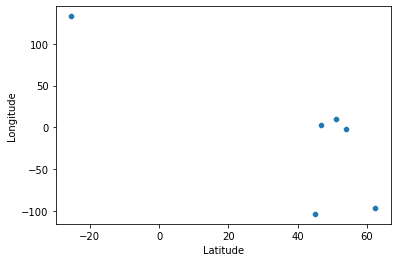

In [3]:
sns.scatterplot(x = df['Latitude'], y = df['Longitude'])

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

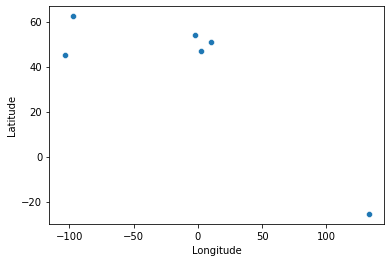

In [4]:
sns.scatterplot(x = df['Longitude'], y = df['Latitude'])

In [6]:
x = df[['Longitude','Latitude']]
x

,Longitude,Latitude
0,-103.77,44.97
1,-96.80,62.40
2,2.40,46.75
3,-2.53,54.01
4,10.40,51.15
5,133.11,-25.45


# Model Training

In [22]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [23]:
y_var = kmeans.fit_predict(x)
y_var

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 0, 0, 0, 1])

# WCSS

In [15]:
kmeans.inertia_   #K = 2

13205.758119999999

In [18]:
kmeans.inertia_   #K = 4

111.91233333333332

In [21]:
kmeans.inertia_   # k = 1

42601.91356666667

In [24]:
kmeans.inertia_ # k = 3

288.1052333333333

In [28]:
wcss_list = []

for i in range(1,7):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    wcss = kmeans.inertia_
    print(f'k == {i} and wcss == {wcss}')
    wcss_list.append(wcss)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k == 1 and wcss == 42601.91356666667


C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k == 2 and wcss == 13205.758119999999


C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k == 3 and wcss == 288.1052333333333


C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k == 4 and wcss == 111.91233333333332


C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k == 5 and wcss == 38.50624999999998


C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k == 6 and wcss == 0.0


Text(0.5, 1.0, 'Elbow Method to Find out the best K Value')

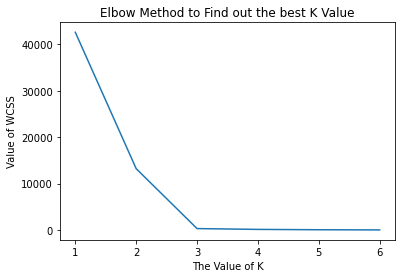

In [31]:
k = range(1,7)
plt.plot(k, wcss_list)
plt.xlabel('The Value of K')
plt.ylabel('Value of WCSS')
plt.title('Elbow Method to Find out the best K Value')

In [32]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [33]:
y_var = kmeans.fit_predict(x)
y_var

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 1, 1, 1, 2])

In [34]:
kmeans.cluster_centers_

array([[-100.285     ,   53.685     ],
       [   3.42333333,   50.63666667],
       [ 133.11      ,  -25.45      ]])

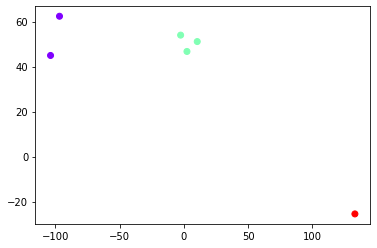

In [36]:
plt.scatter(df['Longitude'], df['Latitude'], c = y_var, cmap = 'rainbow')